User would like to know if average number of installs affects the 
average rating for HEALTH_AND_FITNESS Determine which kind of statistical test to perform. 
Present your statistical analysis with data visualizations of your choosing. Write a detailed report of your findings.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


data = pd.read_csv("googleplaystoremaster.csv")

In [2]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data = data[data.Installs != 'Free']

In [4]:
data['Installs'] = data['Installs'].str.replace('+', '')
data['Installs'] = data['Installs'].str.replace(',', '')
data.Installs=pd.to_numeric(data.Installs)

In [5]:
# removing variables from the dataframe that are not needed
df = data.drop(columns=['Reviews', 'Size', 'Type', 'Price','Genres', 'Content Rating', 
                        'Last Updated', 'Current Ver', 'Android Ver'])
df.head()

,App,Category,Rating,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,100000


In [6]:
df.dtypes

App          object
Category     object
Rating      float64
Installs      int64
dtype: object

In [7]:
df['Installs'].isna().sum()

0

In [8]:
df['Rating'].isna().sum()

1474

In [9]:
df = df.dropna()

df['Rating'].isna().sum()

0

In [10]:
df.head()

,App,Category,Rating,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,100000


In [11]:
df_healthANDfitness = df[df.Category == 'HEALTH_AND_FITNESS']

In [12]:
df_healthANDfitness.head()

,App,Category,Rating,Installs
1256,Home Workout - No Equipment,HEALTH_AND_FITNESS,4.8,10000000
1257,Step Counter - Calorie Counter,HEALTH_AND_FITNESS,4.0,500000
1258,Lose Belly Fat in 30 Days - Flat Stomach,HEALTH_AND_FITNESS,4.9,5000000
1259,Pedometer - Step Counter Free & Calorie Burner,HEALTH_AND_FITNESS,4.8,1000000
1260,Six Pack in 30 Days - Abs Workout,HEALTH_AND_FITNESS,4.9,10000000


In [13]:
X = df_healthANDfitness[['Installs']]

y = df_healthANDfitness['Rating']

In [14]:
X.head()

,Installs
1256,10000000
1257,500000
1258,5000000
1259,1000000
1260,10000000


In [15]:
y.head()

1256    4.8
1257    4.0
1258    4.9
1259    4.8
1260    4.9
Name: Rating, dtype: float64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.2)

In [17]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
linear_regression = LinearRegression()

model = linear_regression.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:
df = pd.DataFrame({'test': y_test, 'predicted': y_pred})

df.sample(10)

,test,predicted
1310,4.6,4.311410
6314,4.8,4.311035
4187,2.9,4.311110
8771,4.0,4.311042
7266,2.2,4.311035
1335,4.6,4.311042
1317,3.9,4.318542
4872,4.4,4.318542
1328,4.4,4.311786
8444,4.8,4.311410


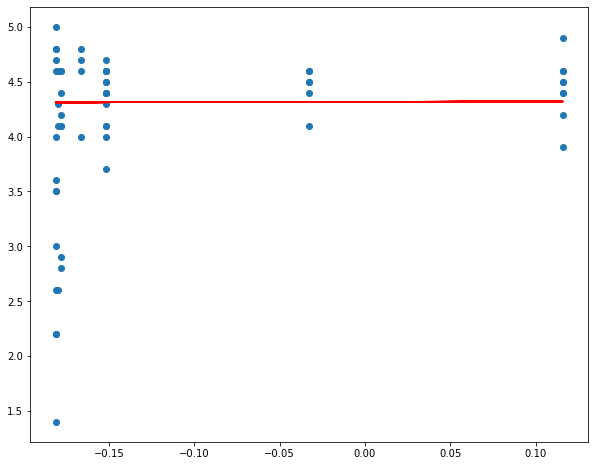

In [21]:
plt.figure(figsize=(10, 8))

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

plt.show()

In [22]:
print("Training score : ", linear_regression.score(X_train, y_train))

Training score :  0.0019437541759158572


In [23]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)

print("Testing score : ", score)

Testing score :  -0.06132785296179888


In [24]:
theta_0 = linear_regression.coef_
theta_0

array([0.02525891])

In [25]:
intercept = linear_regression.intercept_
intercept

4.315611814345991

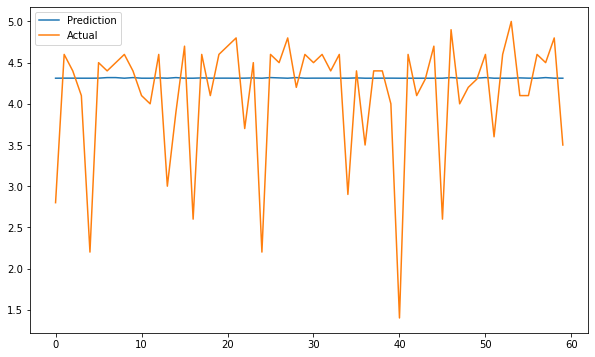

In [26]:
plt.subplots(figsize=(10,6))

plt.plot(y_pred, label="Prediction")
plt.plot(y_test.values, label="Actual")

plt.legend()

plt.show()

In [27]:
X_train[:5]

array([[-0.03260165],
       [-0.18117014],
       [-0.18119688],
       [ 0.11599656],
       [ 0.11599656]])

In [28]:
X_train = sm.add_constant(X_train)

X_train[:5]

array([[ 1.        , -0.03260165],
       [ 1.        , -0.18117014],
       [ 1.        , -0.18119688],
       [ 1.        ,  0.11599656],
       [ 1.        ,  0.11599656]])

In [29]:
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4577
Date:                Fri, 27 Nov 2020   Prob (F-statistic):              0.499
Time:                        06:30:06   Log-Likelihood:                -204.05
No. Observations:                 237   AIC:                             412.1
Df Residuals:                     235   BIC:                             419.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3156      0.037    115.586      0.0

In [30]:
theta_0, intercept

(array([0.02525891]), 4.315611814345991)